# Laboratorium 2
### Piotr Rzeźnik

### Zadanie 
- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy kwadratowej przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

In [3]:
# using Pkg
# Pkg.add("LinearAlgebra")
using LinearAlgebra
function VV_dot_product(V1, V2)
    return dot(V1,V2)
end

function MV_product(M, V)
    return M*V
end;

In [4]:
using Random
using DataFrames
using CSV

df = DataFrame()
a = 200
r1= 1:6
for i=r1
    
    times = Int32[]
    V1 = rand(Float64, a)
    V2 = rand(Float64, a)
    r2=1:11
    for j=r2

        b = time_ns()
        VV_dot_product(V1,V2)
        e = time_ns()
        push!(times, e-b)
    end
    
    name = "VV" * string(a)
    df[!, name]= times
    a *= 2
    
end

a= 200
r3= 1:6
for k=r3  
    
    times = Int32[];
    M = rand(Float64, (a,a))
    V = rand(Float64, a)
    r4 = 1:11
    for l=r4

        b = time_ns()
        MV_product(M, V)
        e = time_ns()
        push!(times, e-b)
    end
    
    name = "MV" * string(a);
    df[!, name]= times
    a *= 2
    
end
df = df[2:11,:]
CSV.write("times.csv", df)

"times.csv"

In [5]:
input="times.csv"
mydata=CSV.read(input, delim=",",DataFrame)

,VV200,VV400,VV800,VV1600,VV3200,VV6400,MV200,MV400,MV800,MV1600,MV3200
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1800,200,100,200,600,1100,10800,11900,105100,625700,2689300
2,200,100,100,200,600,1100,5300,12400,84900,567100,2712300
3,100,100,100,200,600,1100,4800,12600,53600,577700,2662900
4,100,0,100,200,600,1100,4900,12200,51600,539200,2718500
5,100,100,100,200,500,1000,3800,12700,50100,549300,2728500
6,100,100,200,200,500,1000,4400,22900,48700,518900,2705000
7,100,0,100,100,600,1000,4200,12300,59700,546700,2728300
8,100,100,100,200,600,1000,4300,12500,49700,529500,2783000
9,100,100,100,200,600,1100,3300,12400,48500,563100,2790100


In [6]:
using Statistics
mydata_mean = Float64[]
for col in eachcol(mydata)
    push!(mydata_mean, mean(col))
end

In [7]:
mydata_std = Float64[]
for col in eachcol(mydata)
    push!(mydata_std, std(col))
end

In [8]:
VVdf = DataFrame()
VVdf[!,:index] = [200, 400, 800, 1600, 3200, 6400]
VVdf[!,:mean] = mydata_mean[1:6]
VVdf[!,:std] = mydata_std[1:6]
VVdf

,index,mean,std
,Int64,Float64,Float64
1,200,280.0,534.997
2,400,80.0,63.2456
3,800,110.0,31.6228
4,1600,190.0,31.6228
5,3200,580.0,42.1637
6,6400,1060.0,51.6398


In [9]:
MVdf = DataFrame()
MVdf[!,:index] = [200, 400, 800, 1600, 3200, 6400]
MVdf[!,:mean] = mydata_mean[7:12]
MVdf[!,:std] = mydata_std[7:12]
MVdf

,index,mean,std
,Int64,Float64,Float64
1,200,5040.0,2101.43
2,400,15320.0,6520.36
3,800,59830.0,19477.5
4,1600,555040.0,30741.8
5,3200,2.72702e6,39530.7
6,6400,1.21406e7,347302.0


In [10]:
using Plots
gr(leg = false, bg = :white,titlefont=font("serif"), legend = false);

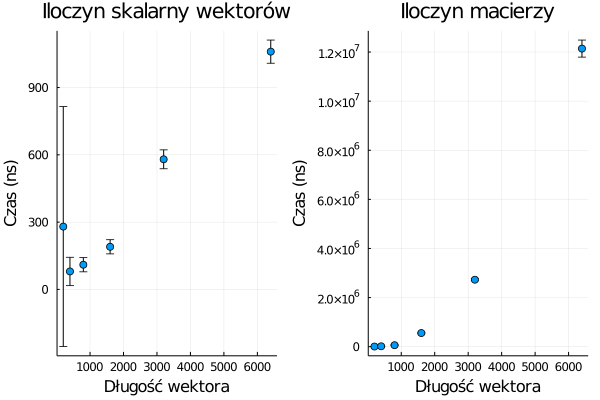

In [11]:
plot(scatter(VVdf.index, VVdf.mean, yerr=VVdf.std, title="Iloczyn skalarny wektorów", xlabel="Długość wektora",ylabel="Czas (ns)")
, scatter(MVdf.index,  MVdf.mean, yerr=MVdf.std, title="Iloczyn macierzy", xlabel="Długość wektora",ylabel="Czas (ns)"))